# Introduction to dynamic programming

#### __What is Sliding Window Technique__?
> Sliding Window Technique is a method used to efficiently solve problems that involve defining a window or range in the input data (arrays or strings) and then moving that window across the data to perform some operation within the window. This technique is commonly used in algorithms like finding subarrays with a specific sum, finding the longest substring with unique characters, or solving problems that require a fixed-size window to process elements efficiently.


Let’s take an example to understand this properly, say we have an array of size N and also an integer K. Now, we have to calculate the maximum sum of a subarray having size exactly K. Now how should we approach this problem?

One way to do this by taking each subarray of size K from the array and find out the maximum sum of these subarrays. This can be done using Nested loops which will result into O(N2) Time Complexity.

##### But can we optimize this approach?

The answer is **Yes**, instead of taking each K sized subarray and calculating its sum, we can just take one K size subarray from 0 to K-1 index and calculate its sum now shift our range one by one along with the iterations and update the result, like in next iteration increase the left and right pointer and update the previous sum as shown in the below image:

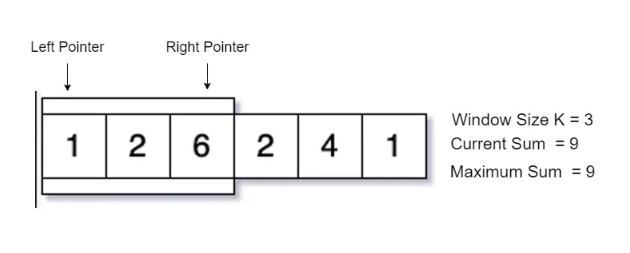

#### Now follow this method for each iteration till we reach the end of the array:

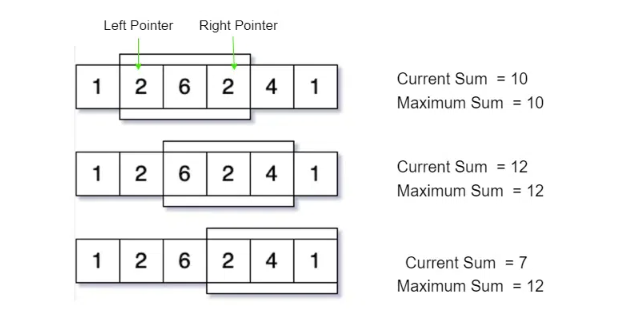

> So, we can see that instead of recalculating the sum of each K sized subarray we are using previous window of size K and using its results we update the sum and shift the window right by moving left and right pointers, this operation is optimal because it take O(1) time to shift the range instead of recalculating.

This approach of shifting the pointers and calculating the results accordingly is known as Sliding window Technique.

### How to Identify Sliding Window Problems:
- These problems generally require Finding Maximum/Minimum Subarray, Substrings which satisfy some specific condition.
- The size of the subarray or substring ‘K’ will be given in some of the problems.
- These problems can easily be solved in O(N2) time complexity using nested loops, using sliding window we can solve these in O(n) Time Complexity.
- Required Time Complexity: O(N) or O(Nlog(N))
- Constraints: N <= 106 , If N is the size of the Array/String.

In [ ]:
# we will give you a problem, dont worry too much on getting it right at first

# 643. Maximum Average Subarray I

Difficulty: Easy 
Topics: Array, Sliding Window  

## Problem Statement  

You are given an integer array `nums` consisting of `n` elements, and an integer `k`.  

Find a contiguous subarray whose length is equal to `k` that has the maximum average value and return this value. Any answer with a calculation error less than `10⁻⁵` will be accepted.  

### Example 1:  
**Input:**  
```
nums = [1,12,-5,-6,50,3], k = 4
```
**Output:**  
```
12.75000
```
**Explanation:**  
Maximum average is `(12 - 5 - 6 + 50) / 4 = 51 / 4 = 12.75`

### Example 2:  
**Input:**  
```
nums = [5], k = 1
```
**Output:**  
```
5.00000
```

## Constraints:  

- `n == nums.length`  
- `1 <= k <= n <= 10⁵`  
- `-10⁴ <= nums[i] <= 10⁴`  


In [ ]:
# try it out yourself here -> https://leetcode.com/problems/maximum-average-subarray-i/

In [ ]:
# solution given
def findMaxAverage(nums, k):
    # Compute the sum of the first k elements
    max_sum = curr_sum = sum(nums[:k])
    
    # Slide the window across the array
    for i in range(k, len(nums)):
        curr_sum += nums[i] - nums[i - k]  # Add new element, remove old element
        max_sum = max(max_sum, curr_sum)   # Update max sum if needed

    return max_sum / k  # Return the maximum average

#### Time Complexity:
- O(n) (efficient, since we traverse the array only once).

In [ ]:
# See leetcode in the previous slide to find more easy based problems, 
# the idea is to understand what you get wrong, so looking at solutions and 
# breaking it down is a key way you will understand this content


### **Understanding Time Complexity (Big O Notation)** 

Time complexity describes how the execution time of an algorithm increases as the size of the input (`n`) grows. It helps us analyze the efficiency of an algorithm. Below are the most common time complexities with explanations and examples.

## **1. O(1) - Constant Time**
- The runtime does **not** depend on the input size (`n`).

In [ ]:
# Example
def get_first_element(arr):
      return arr[0]  # Always takes the same time, regardless of arr size

- Even if `arr` has 10 or 1,000,000 elements, this function will always execute in constant time.

## **2. O(log n) - Logarithmic Time**
- The runtime **reduces the problem size** by a factor (e.g., halves it) in each step.

In [ ]:
# Example: Binary Search
def binary_search(arr, target):
      left, right = 0, len(arr) - 1
      while left <= right:
          mid = (left + right) // 2
          if arr[mid] == target:
              return mid
          elif arr[mid] < target:
              left = mid + 1
          else:
              right = mid - 1
      return -1


- Since the search space is divided by `2` in each step, the time complexity is **O(log n)**.
- Efficient for large datasets.

## **3. O(n) - Linear Time**
- The runtime grows **proportionally** with the input size (`n`).

In [ ]:
# Example: Looping through an array
def print_elements(arr):
      for num in arr:
          print(num)  # Runs n times

- If `arr` has 1,000 elements, the loop runs **1,000 times**.
- Common in problems requiring **single-pass iteration** (like our sliding window solution).

## **4. O(n log n) - Quasilinear Time**
- The runtime is **slightly worse than linear**.
- Common in efficient sorting algorithms like **Merge Sort** and **QuickSort**.

In [ ]:
# Example: Merge Sort
def merge_sort(arr):
      if len(arr) <= 1:
          return arr
      mid = len(arr) // 2
      left = merge_sort(arr[:mid])
      right = merge_sort(arr[mid:])
      return merge(left, right)

- Since sorting requires **log(n) levels** of recursion, and each level processes **n** elements, the total complexity is **O(n log n)**.

## **5. O(n²) - Quadratic Time**
- The runtime grows **quadratically** as input increases.
- Common in **nested loops**.

In [ ]:
# Example: Bubble Sort
def bubble_sort(arr):
      n = len(arr)
      for i in range(n):
          for j in range(n - i - 1):
              if arr[j] > arr[j + 1]:
                  arr[j], arr[j + 1] = arr[j + 1], arr[j]

- If `n = 1000`, it runs about **1,000,000 times** (very slow!).

## **6. O(2ⁿ) - Exponential Time**
- The runtime doubles with each additional input.
- Common in **recursive algorithms** like the naive Fibonacci solution.

In [ ]:
# Example: Recursive Fibonacci
def fibonacci(n):
      if n <= 1:
          return n
      return fibonacci(n - 1) + fibonacci(n - 2)

- If `n = 10`, there are **1024 recursive calls**.
- If `n = 50`, there are **1.1 trillion recursive calls** (completely impractical!).


## **7. O(n!) - Factorial Time**
- The **worst-case complexity** (bruteforce approaches).

In [ ]:
# Example: Generating all permutations
from itertools import permutations

def all_permutations(arr):
    return list(permutations(arr))

- If `n = 5`, there are **120 permutations**.
- If `n = 10`, there are **3,628,800 permutations**.
- **Extremely inefficient** for large inputs.

### Summary table of the Time complexities given so far

| Complexity | Name | Example Algorithm | Fast? |
|------------|------|------------------|-------|
| **O(1)** | Constant | Accessing array element | ✅ Very Fast |
| **O(log n)** | Logarithmic | Binary Search | ✅ Fast |
| **O(n)** | Linear | Loop through array | ⚠️ Moderate |
| **O(n log n)** | Quasilinear | Merge Sort | ⚠️ Moderate |
| **O(n²)** | Quadratic | Bubble Sort, Nested Loops | ❌ Slow |
| **O(2ⁿ)** | Exponential | Fibonacci (Recursive) | ❌ Very Slow |
| **O(n!)** | Factorial | Generating all permutations | ❌❌ Impractical |


### Final Thoughts from this slide
- **Efficient algorithms** should aim for **O(1), O(log n), or O(n)**.
- **Sorting algorithms** generally take **O(n log n)**.
- **Bruteforce approaches** with **O(n²) or worse** should be avoided for large inputs.